**Introduction to Keras Demo**

**Linear Regression in Keras**

In [17]:
import keras #ML Library
import numpy as np #Mathematics Library
import pandas as pd #Data-handling Library
import matplotlib.pyplot as plt #Used to graph our results

**Next,The csv file is to be loaded**

In [18]:
import io
df = pd.read_csv("/content/IowaHousingPrices.csv")
# Dataset is now stored in a Pandas Dataframe

**Now that we've loaded the csv into pandas, we will separate the two columns of features we want to use. squareFeet will be our x value and salePrice will be our y value.**

In [19]:
squareFeet = df[['SquareFeet']].values #x value
salePrice = df[['SalePrice']].values #y value

In [21]:
import tensorflow as tf
from tensorflow import keras
keras.optimizers.Adam

keras.optimizer_v2.adam.Adam

**Here we create the model and fit it to our square feet and sale price. Adjust the epochs, learning rate, and batch size for the outcome that is the fastest and most accurate.**

**Now that our model is trained, we need to use matplotlib to plot our data and the line that we have created so that we can see how accurate it is.**



In [22]:
model = keras.Sequential()
model.add(keras.layers.Dense(1, input_shape=(1,)))
model.compile(keras.optimizers.Adam(lr=1), 'mean_squared_error')

model.fit(squareFeet,salePrice, epochs=30, batch_size=10)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/30
146/146 [==============================] - 1s 1ms/step - loss: 15685731328.0000
Epoch 2/30
146/146 [==============================] - 0s 1ms/step - loss: 3426424320.0000
Epoch 3/30
146/146 [==============================] - 0s 1ms/step - loss: 3192730880.0000
Epoch 4/30
146/146 [==============================] - 0s 1ms/step - loss: 3195869952.0000
Epoch 5/30
146/146 [==============================] - 0s 1ms/step - loss: 3195851008.0000
Epoch 6/30
146/146 [==============================] - 0s 1ms/step - loss: 3203445760.0000
Epoch 7/30
146/146 [==============================] - 0s 1ms/step - loss: 3190984192.0000
Epoch 8/30
146/146 [==============================] - 0s 1ms/step - loss: 3189530368.0000
Epoch 9/30
146/146 [==============================] - 0s 1ms/step - loss: 3193201664.0000
Epoch 10/30
146/146 [==============================] - 0s 1ms/step - loss: 3188632064.0000
Epoch 11/30
146/146 [==============================] - 0s 1ms/step - loss: 3187131392.0000
Epoch 1

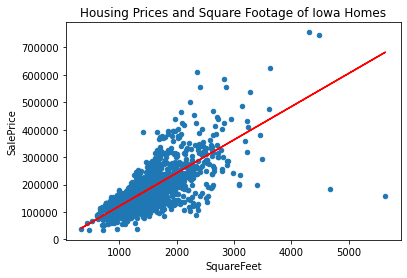

In [23]:
#Plot datapoints
df.plot(kind='scatter',
       x='SquareFeet',
       y='SalePrice', title='Housing Prices and Square Footage of Iowa Homes')


y_pred = model.predict(squareFeet) #The predicted housing price based on square feet

#Plot the linear regression line
plt.plot(squareFeet, y_pred, color='red')

**Finally, if we want to predict the price of a new house, we use the following code. We set the square footage equale to newSF and the output is the expected price in US dollars**

In [24]:
newSF = 2000
print(model.predict([newSF]))

[[242208.12]]


**Keras Convolutional Neural Network (CNN)**

In [25]:
import tensorflow as tf
from tensorflow import keras
keras.datasets
import keras
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

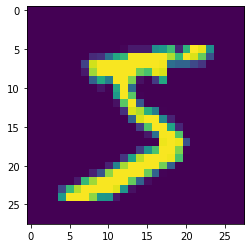

5


In [26]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0]) #training image
plt.show()
print(y_train[0]) #what the number is supposed to be

**Next, we need to break the data down so that the neural network can digest it easier.**

In [27]:
#Reshape the data
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

#Normalize the pixel values from a scale out of 255 to a scale out of 1
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

**Then, we convert the y values (numbers) into ones and zeros, making each number categorical. This is called one-hot encoding. Without it, the neural network might categorize numbers based on how they are related numerically rather than how they look. To learn more about one-hot encoding, [click here](https://www.youtube.com/watch?v=v_4KWmkwmsU)**

In [28]:

print(y_train[0])
import tensorflow as tf


y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

print(y_train[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


**It's time to build the neural network. Each layer is a different type of neuron.**

In [29]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu',
                              input_shape=input_shape))

model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10, activation='softmax'))

**Next, we need to train the network. Feel free to switch around the type optimizer, number of epochs, or batch size. Depending on how fast your GPU is, this model can take some time to train. On the colab GPU, one epoch takes around 2 minutes.**

In [32]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=128,
          epochs=1,
          validation_data=(x_test, y_test))

469/469 [==============================] - 167s 353ms/step - loss: 2.2852 - accuracy: 0.1373 - val_loss: 2.2440 - val_accuracy: 0.3163


**Finally, run the model on the test data and print the results. The first number is the loss and the second number is the accuracy out of 1.**

In [33]:
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 8s 26ms/step - loss: 2.2440 - accuracy: 0.3163
[2.243952989578247, 0.31630000472068787]
